In [1]:
import pandas as pd

pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
from datetime import datetime

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas.*")
%matplotlib inline

In [2]:
nba_df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\nba_2022-23_all_stats_with_salary.csv")
nba_df.shape

(467, 52)

In [3]:
nba_df.head()

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total Minutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,4.9,11.4,0.427,5.1,8.8,0.579,0.614,4.6,5.0,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,1941,24.1,0.656,0.564,0.248,2.3,16.8,9.7,30.0,1.3,0.9,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,0.408,1.0,3.2,0.303,3.1,6.7,0.459,0.457,2.3,3.3,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,755,13.6,0.498,0.322,0.334,2.1,11.4,6.8,35.3,1.8,1.4,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,0.436,1.2,3.9,0.311,4.7,9.7,0.487,0.481,2.8,4.3,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,2126,16.1,0.513,0.289,0.317,4.7,16.5,10.8,38.6,1.7,1.3,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,2.2,6.9,0.321,8.9,15.3,0.580,0.549,4.6,5.9,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,1954,23.9,0.583,0.309,0.268,3.7,20.8,12.5,33.5,1.2,1.4,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,0.560,2.0,4.9,0.404,8.3,13.4,0.617,0.614,6.5,7.1,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,1672,25.9,0.677,0.267,0.387,1.2,19.5,10.5,24.5,1.0,3.4,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [4]:
nba_df = nba_df.rename(columns={"Unnamed: 0": "Id"})

In [5]:
nba_df.columns = [col.replace(" ", "") for col in nba_df.columns]

In [6]:
category_count = 0

for cat in nba_df.dtypes:
    if cat == "object":
        category_count += 1

In [7]:
print("Number of categorical variables:", category_count)

# column 1 is the ID column so we subract 1
numeric_count = nba_df.shape[1] - category_count - 1

print("Number of contineous variables:", numeric_count)

Number of categorical variables: 3
Number of contineous variables: 48


In [8]:
nba_df.columns

Index(['Id', 'PlayerName', 'Salary', 'Position', 'Age', 'Team', 'GP', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'TotalMinutes', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [9]:
salary_description = nba_df['Salary'].describe()
print("Descriptive Statistics for 'Salary':")
print(f"Count: {salary_description['count']}")
print(f"Mean: {salary_description['mean']:.2f}")
print(f"Standard Deviation: {salary_description['std']:.2f}")
print(f"Minimum: {salary_description['min']:.2f}")
print(f"25th Percentile: {salary_description['25%']:.2f}")
print(f"Median (50th Percentile): {salary_description['50%']:.2f}")
print(f"75th Percentile: {salary_description['75%']:.2f}")
print(f"Maximum: {salary_description['max']:.2f}")

Descriptive Statistics for 'Salary':
Count: 467.0
Mean: 8416598.75
Standard Deviation: 10708118.05
Minimum: 5849.00
25th Percentile: 1782621.00
Median (50th Percentile): 3722040.00
75th Percentile: 10633543.50
Maximum: 48070014.00


In [10]:
total_missing = nba_df.isnull().sum().sort_values(ascending=False)
percent_missing = (nba_df.isnull().sum() / nba_df.isnull().count()).sort_values(ascending=False)

missing_data_df = pd.concat([total_missing, percent_missing], axis=1, keys=["Total Missing", "Percent Missing"])
missing_data_df.head(8)

,Total Missing,Percent Missing
FT%,23,0.049251
3P%,13,0.027837
2P%,4,0.008565
TS%,1,0.002141
3PAr,1,0.002141
FTr,1,0.002141
eFG%,1,0.002141
FG%,1,0.002141


In [11]:
null_fg = nba_df[nba_df['FG%'].isnull()]
null_fg

,Id,PlayerName,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TotalMinutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
436,436,Alondes Williams,254446,SG,23,BRK,1,0,5.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,5,-20.9,NaN,NaN,NaN,0.0,22.0,11.2,0.0,0.0,0.0,100.0,17.7,-0.1,0.0,-0.1,-0.517,-21.3,-5.2,-26.5,0.0


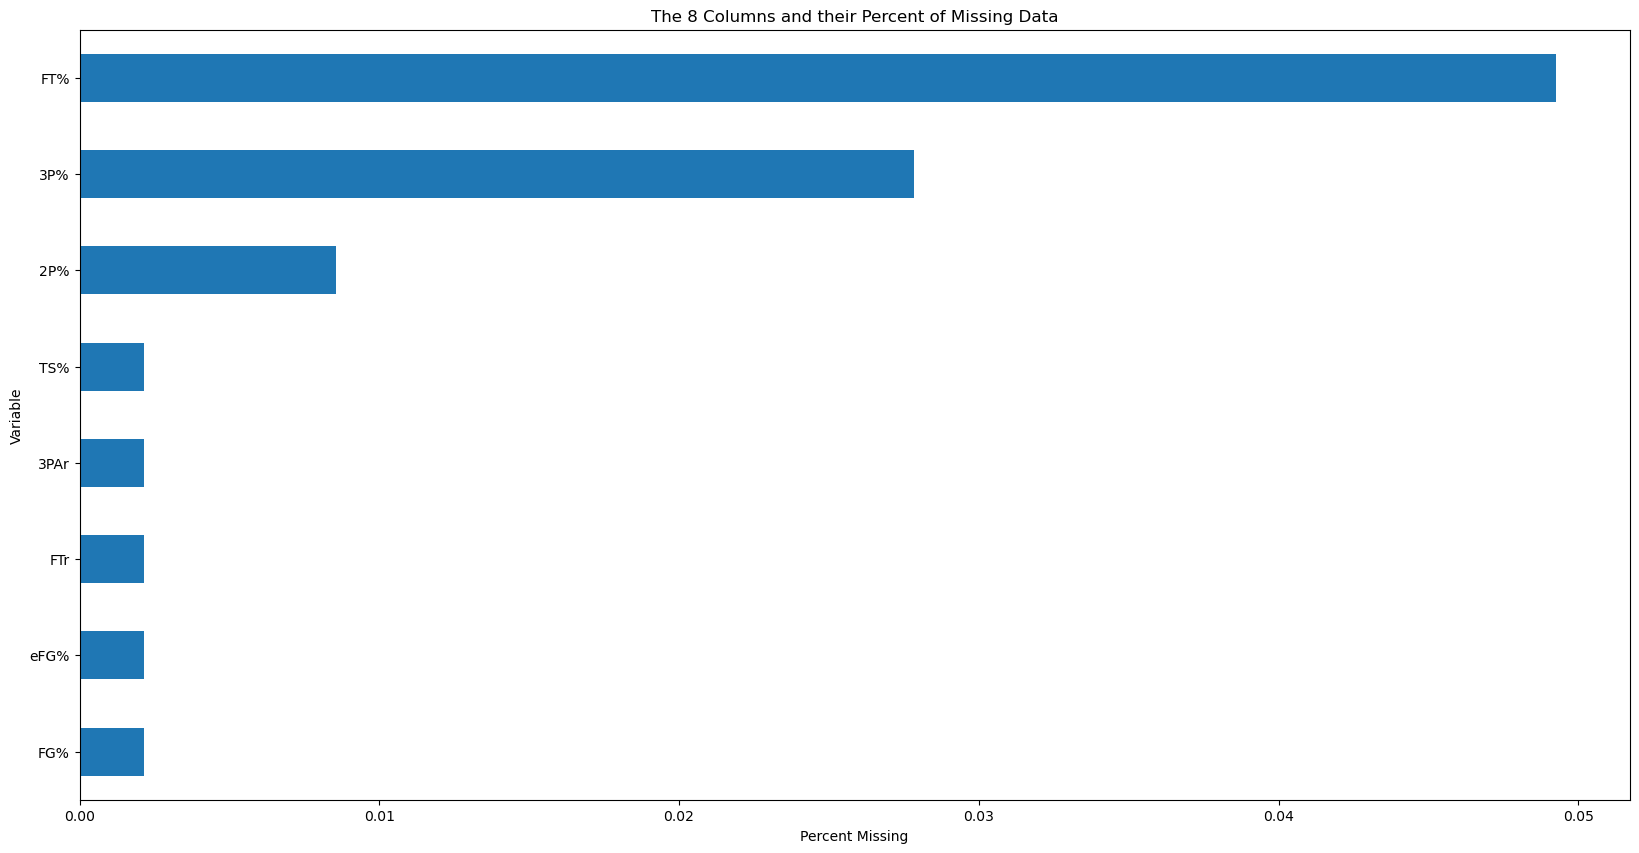

In [12]:
missing_data_df["Percent Missing"].head(8).plot(
    kind="barh", figsize=(20,10)
).invert_yaxis()
plt.xlabel("Percent Missing")
plt.ylabel("Variable")
plt.title("The 8 Columns and their Percent of Missing Data")
plt.show()

In [13]:
cols_to_fill_zero = [
    "FT%",
    "3P%",
    "2P%",
    "TS%",
    "3PAr",
    "FTr",
    "eFG%",
    "FG%",
]

for col in cols_to_fill_zero:
    nba_df[col] = nba_df[col].fillna(0)

In [14]:
imputed_row = nba_df[nba_df["PlayerName"] == "Alondes Williams"]
imputed_row

,Id,PlayerName,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TotalMinutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
436,436,Alondes Williams,254446,SG,23,BRK,1,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,5,-20.9,0.0,0.0,0.0,0.0,22.0,11.2,0.0,0.0,0.0,100.0,17.7,-0.1,0.0,-0.1,-0.517,-21.3,-5.2,-26.5,0.0


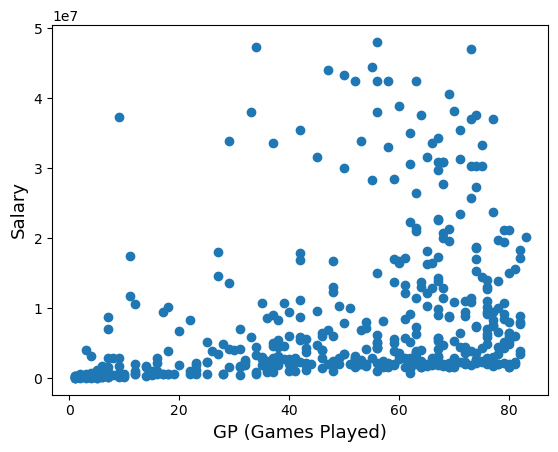

In [15]:
fig, ax = plt.subplots()
ax.scatter(x=nba_df["GP"], y=nba_df["Salary"])
plt.ylabel("Salary", fontsize=13)
plt.xlabel("GP (Games Played)", fontsize=13)
plt.show()

In [16]:
nba_df = nba_df[nba_df['GP'] >= 20]


 mu = 9990402.62 and sigma = 11134520.23



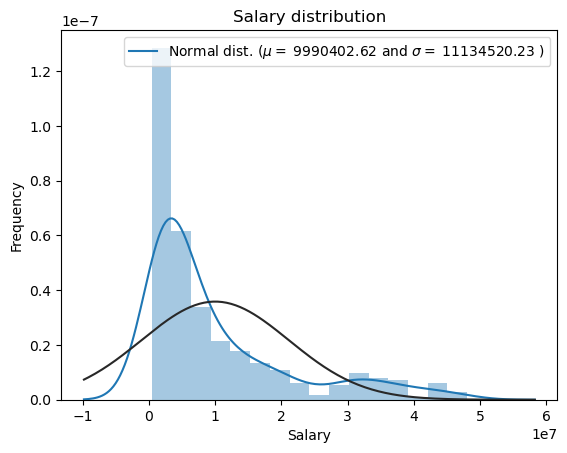

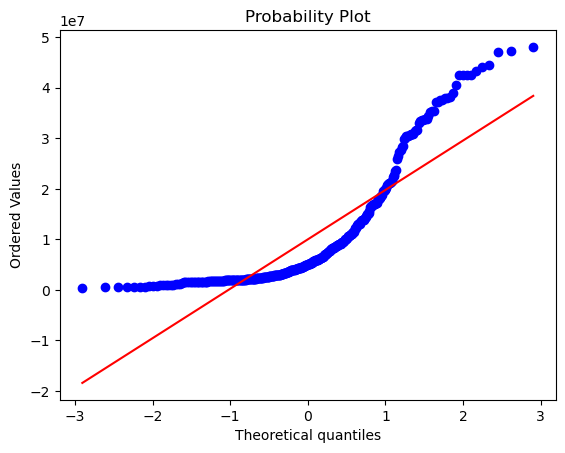

In [17]:
sns.distplot(nba_df["Salary"], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(nba_df["Salary"])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

# Now plot the distribution
plt.legend(
    ["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)], loc="best"
)
plt.ylabel("Frequency")
plt.title("Salary distribution")

# Get also the QQ-plot
fig = plt.figure()
res = probplot(nba_df["Salary"], plot=plt)
plt.show()


 mu = 15.54 and sigma = 1.09



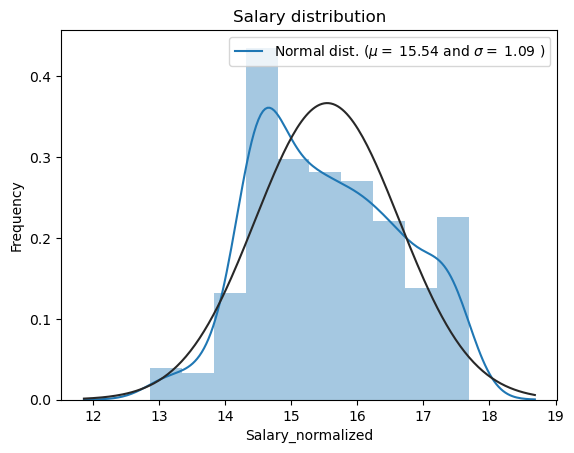

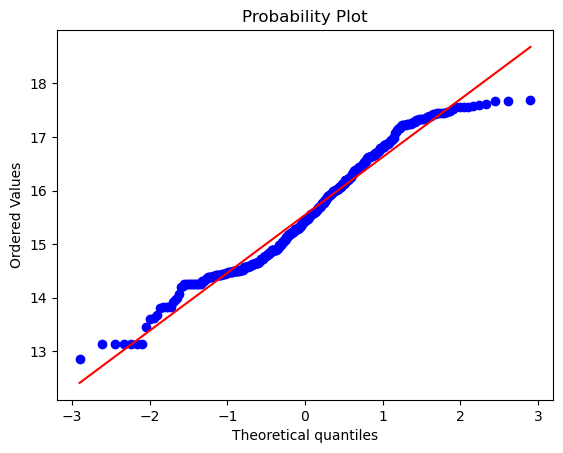

In [18]:
nba_df["Salary_normalized"] = np.log1p(nba_df["Salary"])

# Check the new distribution
sns.distplot(nba_df["Salary_normalized"], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(nba_df["Salary_normalized"])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

# Now plot the distribution
plt.legend(
    ["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)], loc="best"
)
plt.ylabel("Frequency")
plt.title("Salary distribution")

# Get also the QQ-plot
fig = plt.figure()
res = probplot(nba_df["Salary_normalized"], plot=plt)
plt.show()

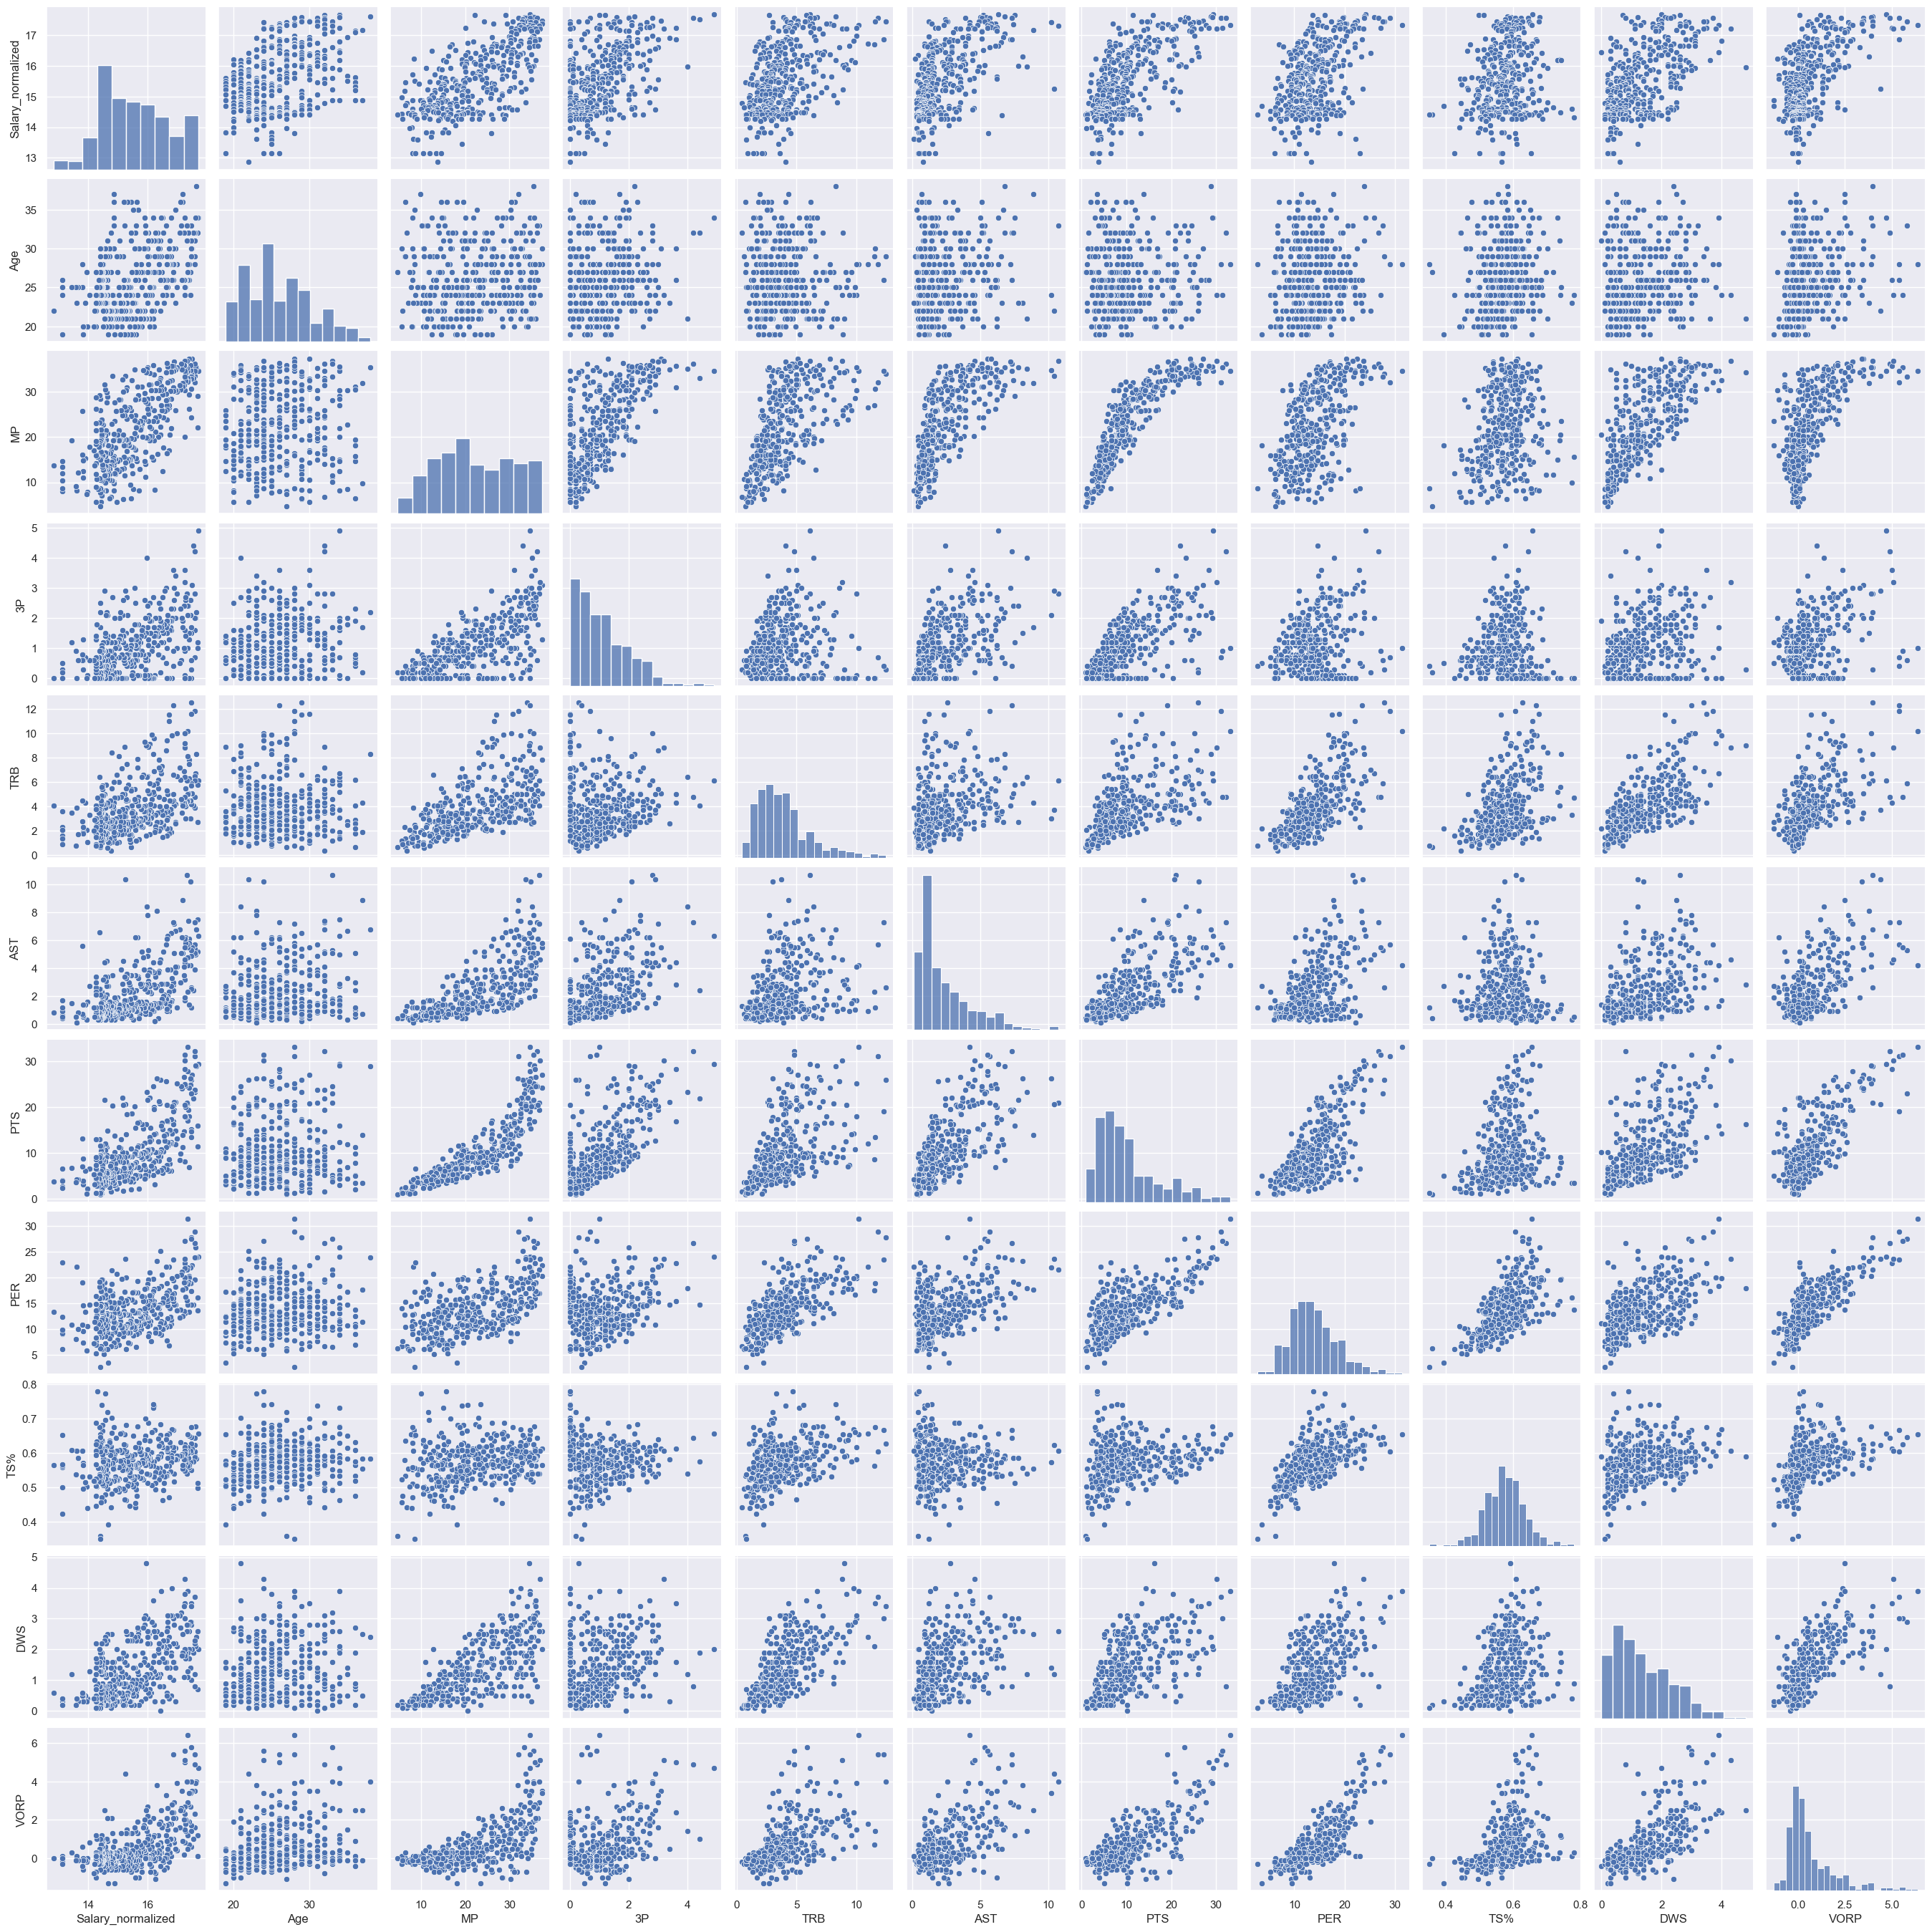

In [19]:
sns.set()
cols = [
    "Salary_normalized",
    "Age",
    "MP",
    "3P",
    "TRB",
    "AST",
    "PTS",
    "PER",
    "TS%",
    "DWS",
    "VORP"
]
sns.pairplot(nba_df[cols], size=2.5)
plt.show();

In [20]:
numeric_df = nba_df.select_dtypes(include=[np.number])
corrmat = numeric_df.corr()

f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=0.8, square=True);

In [21]:
salary_correlations = corrmat['Salary_normalized']
print(salary_correlations.sort_values(ascending=False))

Salary_normalized    1.000000
Salary               0.889315
MP                   0.705716
FG                   0.691265
PTS                  0.689810
FGA                  0.682263
TOV                  0.643688
2PA                  0.627971
2P                   0.618999
GS                   0.617404
TotalMinutes         0.602006
VORP                 0.593305
OBPM                 0.587864
FT                   0.583878
FTA                  0.583573
AST                  0.579333
WS                   0.575457
DRB                  0.564469
DWS                  0.559693
BPM                  0.554775
STL                  0.520078
USG%                 0.512979
OWS                  0.509534
3PA                  0.492245
PER                  0.488896
TRB                  0.485257
3P                   0.483699
PF                   0.457441
AST%                 0.436578
Age                  0.429476
WS/48                0.313509
GP                   0.296261
BLK                  0.267544
FT%       

In [22]:
plt.figure(figsize=(20,4))
sns.set_style('whitegrid')
sns.countplot(x='Age',hue='Position', data=nba_df, palette='viridis');

In [23]:
sns.boxplot(x='Position', y='Salary_normalized', data=nba_df, palette='rainbow');

In [24]:
sns.lmplot(y='Salary', x='PTS', data=nba_df, hue='Position', palette='Set1');

In [25]:
sns.jointplot(x='VORP',y='Salary_normalized',data=nba_df,color='purple');

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='DWS', y='Salary_normalized', data=nba_df, hue='Position', palette='viridis', alpha=0.6);

In [27]:
exclude_columns = ['Id', 'Salary', 'Salary_normalized']

# Get the numerical columns excluding the columns to exclude
numeric_columns = [col for col in numeric_df.columns if col not in exclude_columns]

In [28]:
low_corr_columns = [col for col in numeric_columns if abs(corrmat.loc[col, 'Salary']) < 0.2]

print(low_corr_columns)

numeric_df.drop(columns=low_corr_columns, inplace=True)

nba_df.drop(columns=low_corr_columns, inplace=True)

['GP', 'FG%', '3P%', '2P%', 'eFG%', 'ORB', 'TS%', '3PAr', 'ORB%', 'DRB%', 'TRB%', 'STL%', 'BLK%', 'TOV%', 'DBPM']


In [29]:
nba_df

,Id,PlayerName,Salary,Position,Age,Team,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,FT%,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TotalMinutes,PER,FTr,AST%,USG%,OWS,DWS,WS,WS/48,OBPM,BPM,VORP,Salary_normalized
0,0,Stephen Curry,48070014,PG,34,GSW,56,34.7,10.0,20.2,4.9,11.4,5.1,8.8,4.6,5.0,0.915,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,1941,24.1,0.248,30.0,31.0,5.8,2.0,7.8,0.192,7.5,7.5,4.7,17.688169
1,1,John Wall,47345760,PG,32,LAC,3,22.2,4.1,9.9,1.0,3.2,3.1,6.7,2.3,3.3,0.681,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,755,13.6,0.334,35.3,27.0,-0.4,0.7,0.3,0.020,-0.8,-1.2,0.1,17.672988
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,24,29.1,5.9,13.6,1.2,3.9,4.7,9.7,2.8,4.3,0.656,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,2126,16.1,0.317,38.6,27.7,-0.6,2.6,1.9,0.044,0.3,0.2,1.2,17.667363
3,3,LeBron James,44474988,PF,38,LAL,54,35.5,11.1,22.2,2.2,6.9,8.9,15.3,4.6,5.9,0.768,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,1954,23.9,0.268,33.5,33.3,3.2,2.4,5.6,0.138,5.5,6.1,4.0,17.610438
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,35.6,10.3,18.3,2.0,4.9,8.3,13.4,6.5,7.1,0.919,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,1672,25.9,0.387,24.5,30.7,4.7,2.1,6.8,0.194,6.0,7.1,3.9,17.602420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,418,Luka Garza,508891,C,24,MIN,0,8.7,2.3,4.1,0.5,1.4,1.8,2.8,1.5,1.9,0.788,1.1,2.3,0.6,0.1,0.1,0.5,1.5,6.5,243,23.0,0.448,11.8,26.9,0.9,0.2,1.1,0.211,2.2,-0.4,0.1,13.139991
419,419,Kevon Harris,508891,SG,25,ORL,0,13.4,1.4,3.1,0.5,1.3,0.9,1.9,0.9,1.2,0.756,1.2,2.1,0.5,0.5,0.1,0.6,1.6,4.1,457,9.2,0.383,4.7,13.7,0.2,0.4,0.6,0.065,-3.5,-3.6,-0.2,13.139991
422,422,Dominick Barlow,508891,PF,19,SAS,0,14.6,1.6,3.1,0.0,0.1,1.6,2.9,0.6,0.9,0.720,2.0,3.6,0.9,0.4,0.7,0.5,2.0,3.9,408,12.4,0.291,7.6,11.3,0.5,0.2,0.7,0.082,-3.7,-4.6,-0.3,13.139991
424,424,Jeff Dowtin,508891,PG,25,TOR,0,10.4,1.0,2.3,0.2,0.6,0.8,1.6,0.2,0.4,0.667,0.7,0.9,1.2,0.4,0.1,0.2,0.5,2.4,259,9.9,0.158,15.5,10.9,0.2,0.2,0.4,0.076,-2.8,-1.9,0.0,13.139991


In [30]:
from sklearn.preprocessing import LabelEncoder

# Create label encoders
position_encoder = LabelEncoder()
team_encoder = LabelEncoder()

# Perform label encoding for 'Position' and 'Team' variables
nba_df['Position_encoded'] = position_encoder.fit_transform(nba_df['Position'])
nba_df['Team_encoded'] = team_encoder.fit_transform(nba_df['Team'])

# Drop the original 'Position' and 'Team' columns
nba_df.drop(['Position', 'Team'], axis=1, inplace=True)
nba_df.head()

,Id,PlayerName,Salary,Age,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,FT%,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TotalMinutes,PER,FTr,AST%,USG%,OWS,DWS,WS,WS/48,OBPM,BPM,VORP,Salary_normalized,Position_encoded,Team_encoded
0,0,Stephen Curry,48070014,34,56,34.7,10.0,20.2,4.9,11.4,5.1,8.8,4.6,5.0,0.915,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,1941,24.1,0.248,30.0,31.0,5.8,2.0,7.8,0.192,7.5,7.5,4.7,17.688169,2,22
1,1,John Wall,47345760,32,3,22.2,4.1,9.9,1.0,3.2,3.1,6.7,2.3,3.3,0.681,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,755,13.6,0.334,35.3,27.0,-0.4,0.7,0.3,0.020,-0.8,-1.2,0.1,17.672988,2,29
2,2,Russell Westbrook,47080179,34,24,29.1,5.9,13.6,1.2,3.9,4.7,9.7,2.8,4.3,0.656,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,2126,16.1,0.317,38.6,27.7,-0.6,2.6,1.9,0.044,0.3,0.2,1.2,17.667363,2,34
3,3,LeBron James,44474988,38,54,35.5,11.1,22.2,2.2,6.9,8.9,15.3,4.6,5.9,0.768,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,1954,23.9,0.268,33.5,33.3,3.2,2.4,5.6,0.138,5.5,6.1,4.0,17.610438,1,32
4,4,Kevin Durant,44119845,34,47,35.6,10.3,18.3,2.0,4.9,8.3,13.4,6.5,7.1,0.919,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,1672,25.9,0.387,24.5,30.7,4.7,2.1,6.8,0.194,6.0,7.1,3.9,17.602420,1,6


In [31]:
skewed_feats = (
    numeric_df
    .apply(lambda x: skew(x.dropna()))
    .sort_values(ascending=False)
)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({"Skew": skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
BLK,2.220945
FT,2.082965
FTA,2.023634
VORP,1.788223
Salary,1.621728
AST,1.488839
OWS,1.450663
2P,1.312279
TRB,1.262540
2PA,1.252502


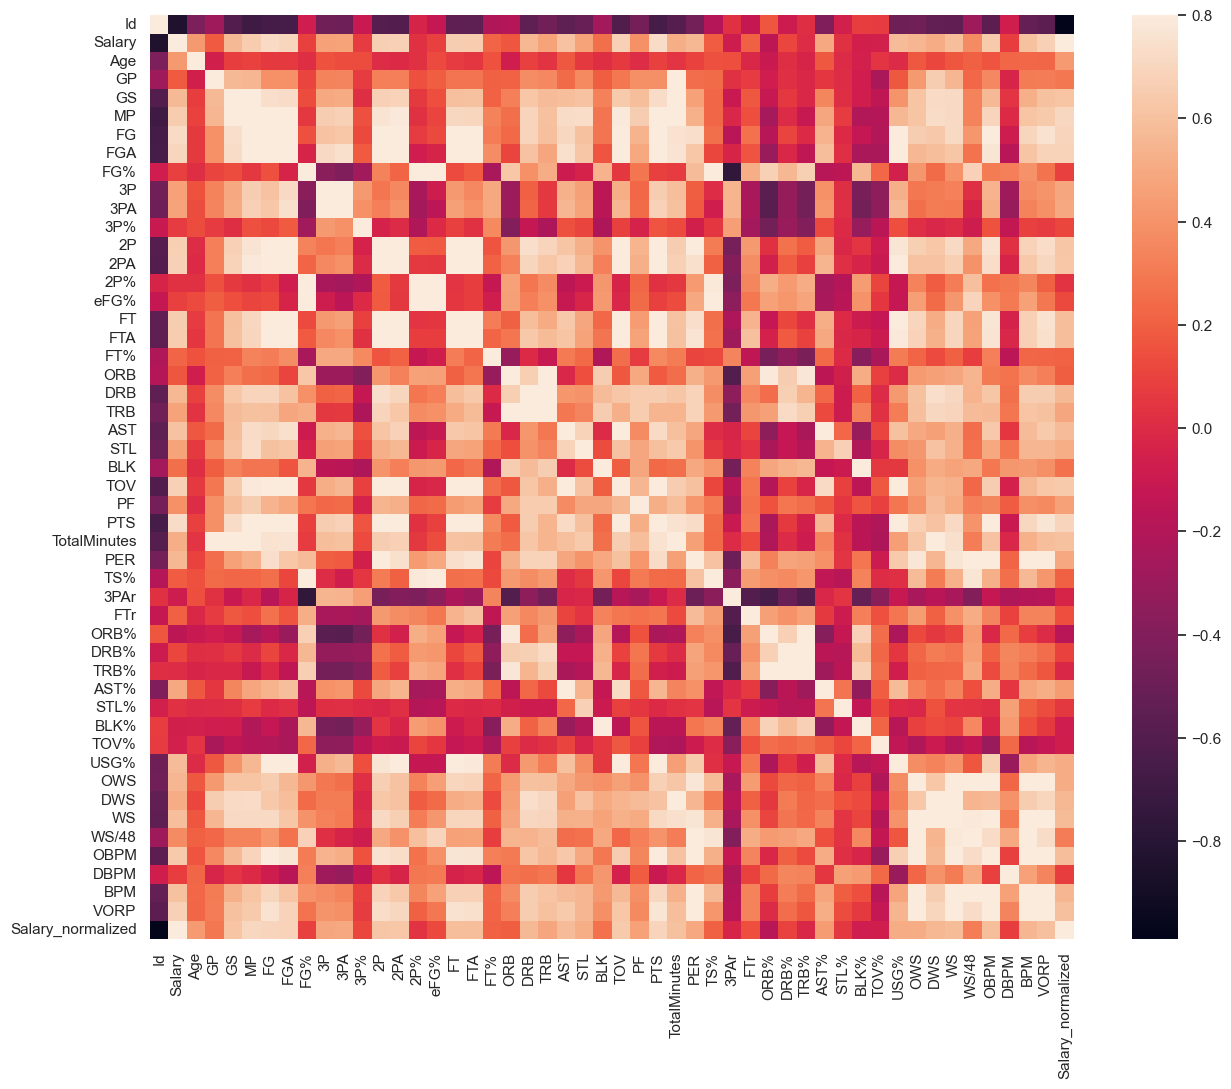

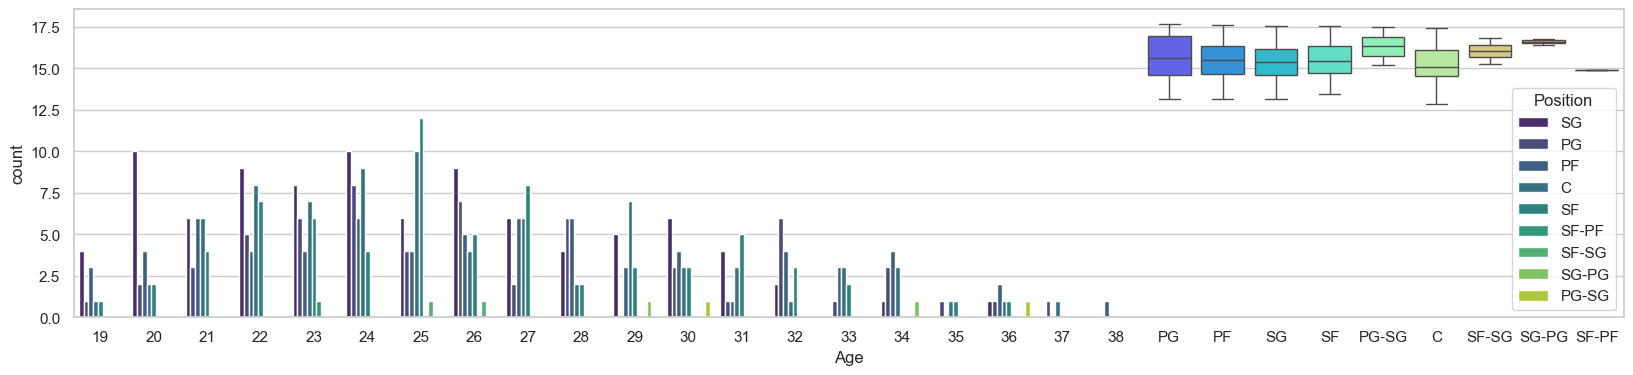

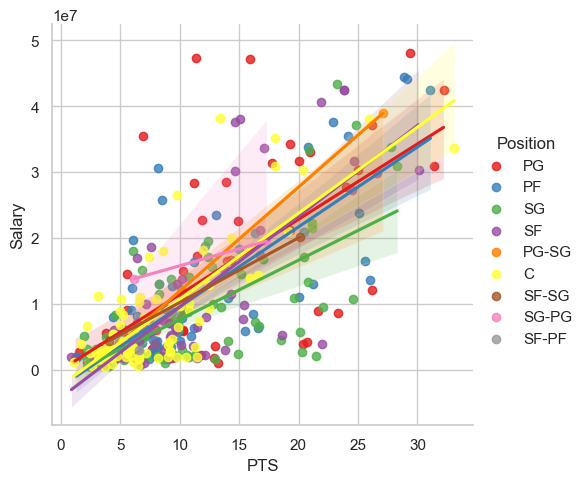

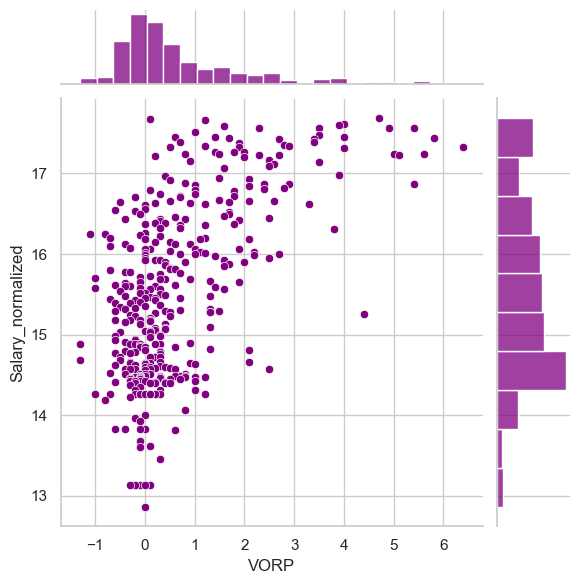

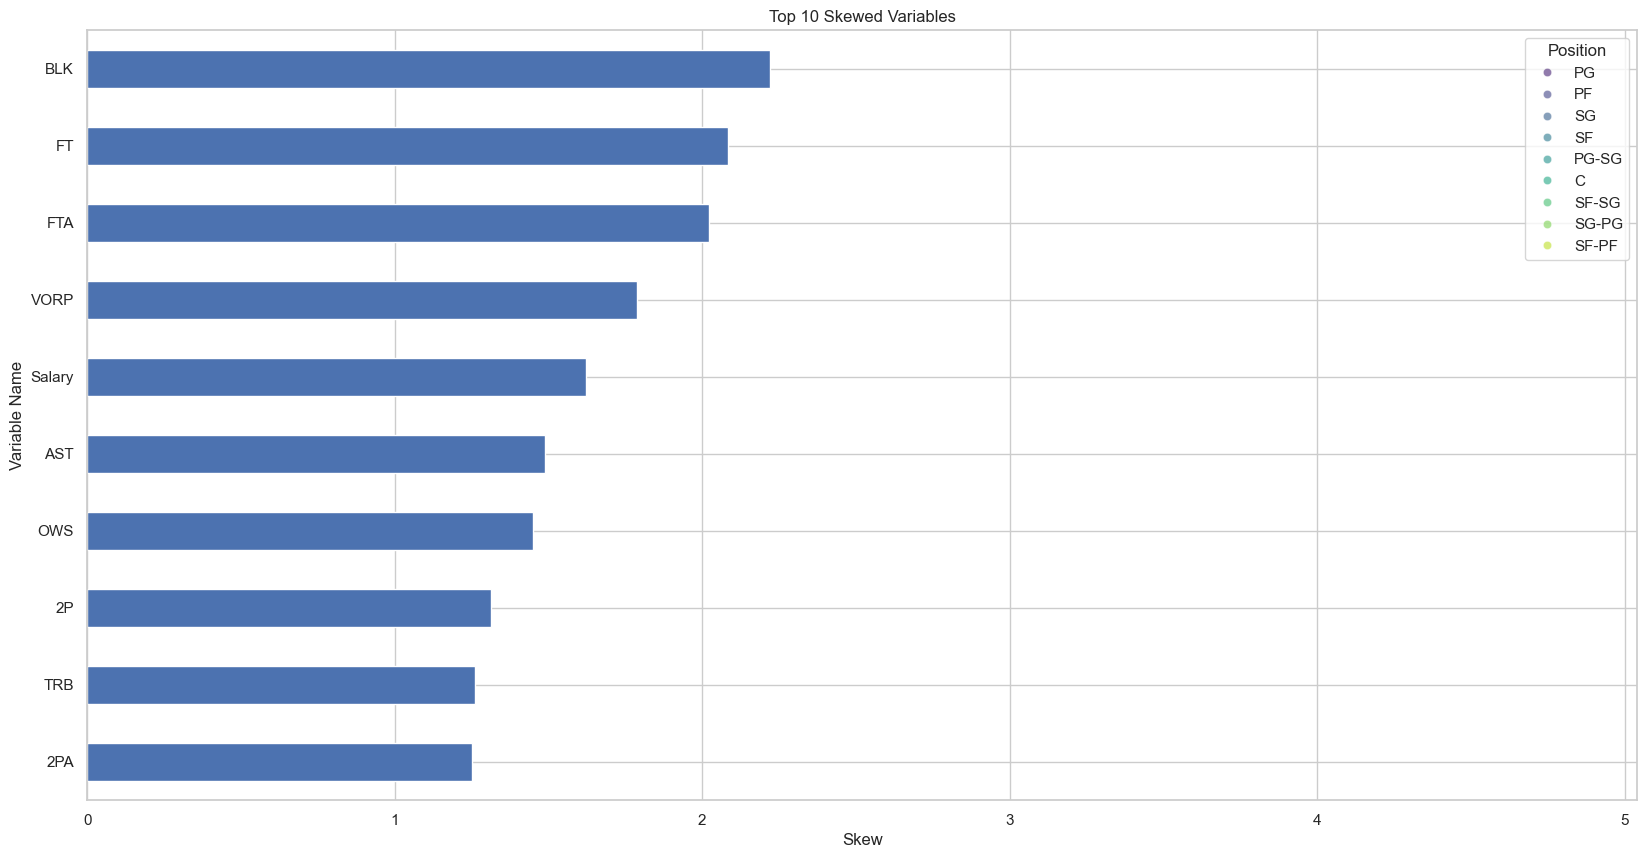

In [32]:
skewness["Skew"].head(10).plot(
    kind="barh", figsize=(20, 10)
).invert_yaxis()  # top 10 skewed columns
plt.xlabel("Skew")
plt.ylabel("Variable Name")
plt.title("Top 10 Skewed Variables")
plt.show()

In [33]:
skewness = skewness[abs(skewness) > 0.75]
print(
    "There are {} skewed numerical features to Box Cox transform (normalize)".format(
        skewness.shape[0]
    )
)

There are 35 skewed numerical features to Box Cox transform (normalize)


In [34]:
negative_value_columns = numeric_df.columns[(numeric_df < 0).any()]

# Print the list of column names
print("Columns with negative values:")
print(negative_value_columns.tolist())

Columns with negative values:
['OWS', 'WS', 'WS/48', 'OBPM', 'BPM', 'VORP']


In [35]:
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    # skip over columns that don't need transformation
    # skip over columns that have negative values so that they don't become NULL when transforming
    if feat not in [
        "Id",
        "Salary",
        "Salary_normalized",
        "Salary17-18",
        "Salary18-19",
        "Salary19-20",
        "Salary20-21",
        "Salary21-22",
        'OWS', 
        'WS', 
        'WS/48', 
        'OBPM', 
        'DBPM', 
        'BPM', 
        'VORP'
    ]:
        nba_df[feat] = boxcox1p(nba_df[feat], lam)

In [36]:
# check that the box cot did not add any NULL values
null_columns = nba_df.columns[nba_df.isnull().any()]
null_count = nba_df[null_columns].isnull().sum()

print("Column Name: NULL Count")
for i in range(0, len(null_columns)):
    print(f"{null_columns[i]}: {null_count[i]}")

Column Name: NULL Count


In [41]:
!pip install scikit-optimize

In [42]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from skopt import BayesSearchCV

In [43]:
lr_w_int = LinearRegression()
lr_no_int = LinearRegression(fit_intercept=False)
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.1)
rf = RandomForestRegressor(n_estimators=500)
dt = DecisionTreeRegressor(max_depth=10)
model_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01)
model_xgb_hyper = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01)

In [44]:
def hyperparameter_tune_bayesian(X_train, y_train, regressor):
    """
    Perform hyperparameter tuning for XGBoost using Bayesian search.

    Parameters:
    - X_train: pandas DataFrame
        Training features.
    - y_train: pandas Series
        Training target variable.
    - regressor_type: str
        Type of regressor to tune ('xgboost').

    Returns:
    - best_params: dict
        Best hyperparameters found during tuning.
    """
    # Define the common parameter space for both XGBoost
    param_space_common = {
        "n_estimators": (100, 1200),
        "learning_rate": (0.01, 0.2, "log-uniform"),
        "max_depth": (3, 10),
    }

    regressor_type = regressor.lower()
    if regressor_type == "xgboost":
        regressor = xgb.XGBRegressor()
    else:
        raise ValueError("Unsupported regressor type. Choose 'xgboost'.")

    # Update the search space with common parameters
    param_space = param_space_common.copy()

    # Perform Bayesian search
    bayes_search = BayesSearchCV(
        estimator=regressor,
        search_spaces=param_space,
        scoring="neg_mean_squared_error",
        cv=5,
        n_jobs=-1,  # Set the number of parallel jobs
    )
    bayes_search.fit(X_train, np.log1p(y_train))

    # Get the best hyperparameters
    best_params = bayes_search.best_params_

    return best_params

In [45]:
def k_fold_regression(
    data,
    regressor,
    target_column="Salary",
    cols_to_ignore=['Salary', 'Id', 'PlayerName', 'Salary_normalized'],
    n_splits=5,
    tune_hyperparameters=False,
    model_name=None
):
    rmse_scores = []
    train_sizes = []
    test_sizes = []
    fold_results = []

    # Prepare the feature matrix X and target vector y
    X = data.drop(columns=cols_to_ignore)
    y = data[target_column]

    # Initialize KFold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True)

    # Cross-validation process
    foldCount = 0
    fold_models = []
    for train_index, val_index in kf.split(X):
        if (
            isinstance(regressor, (xgb.XGBRegressor))
            and tune_hyperparameters
        ):
            if isinstance(regressor, xgb.XGBRegressor):
                regressor_type = "xgboost"
            else:
                raise ValueError(
                    "Unsupported regressor type. Supported types: XGBRegressor"
                )

            # Use the entire training data for hyperparameter tuning
            best_params = hyperparameter_tune_bayesian(X, y, regressor_type)
            print(f"Best hyperparameters for {regressor_type} Fold: {best_params}")
            regressor.set_params(**best_params)

        # Split into training and validation folds
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

        # Fit the model on the training fold
        regressor.fit(X_train_fold, np.log1p(y_train_fold))  # Fit on log-transformed target
        fold_models.append(regressor)
        y_pred_log_fold = regressor.predict(X_val_fold)
        y_pred_fold = np.expm1(y_pred_log_fold)  # Convert back to original scale

        # Calculate RMSE for the validation fold
        rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))

        if (
            isinstance(regressor, (xgb.XGBRegressor))
            and tune_hyperparameters
        ):
            print(model_name, f"RMSE: {rmse:.4f}, Train Size: {len(y_train_fold)}, Test Size: {len(y_val_fold)}")

        # if regular xgboost, then print rmse for best folds since this is a high performing model
        elif isinstance(regressor, RandomForestRegressor):
            print(f"Random Forest: {rmse:.4f}, Train Size: {len(y_train_fold)}, Test Size: {len(y_val_fold)}")

        rmse_scores.append(rmse)
        train_sizes.append(len(y_train_fold))
        test_sizes.append(len(y_val_fold))

        # Record results for 'Id', 'Actual', 'Predicted', 'Fold', and 'Set' in a list
        fold_results.append({
            'Id' : foldCount,
            'Actual': y_val_fold.tolist(),
            'Predicted': y_pred_fold,
            'rmse' : rmse
        })
        foldCount += 1

        
    # Create a DataFrame from the results
    result_df = pd.DataFrame(
        fold_results, columns=["Id", "Actual", "Predicted", 'rmse']
    )

    return result_df, rmse_scores, train_sizes, test_sizes, fold_models

In [46]:
def compute_rmse_std_k_fold(df, model, tune_hyper=False, model_name=None):
    rmse_list = []
        
    rmse_list.append(k_fold_regression(df, model, tune_hyperparameters=tune_hyper, model_name=model_name)[1])

    mean = np.mean(rmse_list)
    std = np.std(rmse_list)

    return mean, std

In [47]:
#Get the avg rmse and std over 30 tests for each model
lr_no_int_list = compute_rmse_std_k_fold(nba_df, lr_no_int)
lr_w_int_list = compute_rmse_std_k_fold(nba_df, lr_w_int)
elastic_net_list = compute_rmse_std_k_fold(nba_df, elastic_net)
dt_list = compute_rmse_std_k_fold(nba_df, dt)
rf_list = compute_rmse_std_k_fold(nba_df, rf)
model_xgb_list = compute_rmse_std_k_fold(nba_df, model_xgb)

#The next line takes a while (Roughly 10 mins), If want to quickly run, comment out this line and the line below in data
model_xgb_hyper_list = compute_rmse_std_k_fold(nba_df, model_xgb, tune_hyper=True)

# plot RMSE and STD for each Algorithm
data = {
    "Linear (No Intercept)": lr_no_int_list,
    "Linear (w/ Intercept)": lr_w_int_list,
    "Elastic Net": elastic_net_list,
    "Decision Tree": dt_list,
    "Random Forest": rf_list,
    "XGBoost": model_xgb_list,

    "XGBoost Hyper": model_xgb_hyper_list,
}
data_df = pd.DataFrame(data=data).T.reset_index().sort_values(by=[0], ascending=True)
data_df.columns = ["Algorithm", "RMSE", "STD"]

Random Forest: 7363204.3717, Train Size: 300, Test Size: 76
Random Forest: 6217982.8804, Train Size: 301, Test Size: 75
Random Forest: 5804269.3890, Train Size: 301, Test Size: 75
Random Forest: 5071903.7482, Train Size: 301, Test Size: 75
Random Forest: 6543592.1621, Train Size: 301, Test Size: 75
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.10476500522147136, 'max_depth': 3, 'n_estimators': 848})
None RMSE: 7420175.1474, Train Size: 300, Test Size: 76
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.06026070733136771, 'max_depth': 3, 'n_estimators': 100})
None RMSE: 6181843.5459, Train Size: 301, Test Size: 75
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.08046619330729124, 'max_depth': 3, 'n_estimators': 926})
None RMSE: 5518944.4563, Train Size: 301, Test Size: 75
Best hyperparameters for xgboost Fold: OrderedDict({'learning_rate': 0.046156626270996814, 'max_depth': 3, 'n_estimators': 100})
None RMSE: 5279490.

In [48]:
data_df

,Algorithm,RMSE,STD
6,XGBoost Hyper,5.966861e+06,7.893729e+05
4,Random Forest,6.200191e+06,7.616596e+05
5,XGBoost,6.297593e+06,7.590899e+05
2,Elastic Net,6.825037e+06,6.594440e+05
1,Linear (w/ Intercept),6.906663e+06,7.178573e+05
0,Linear (No Intercept),7.175941e+06,6.580348e+05
3,Decision Tree,7.696921e+06,1.111630e+06


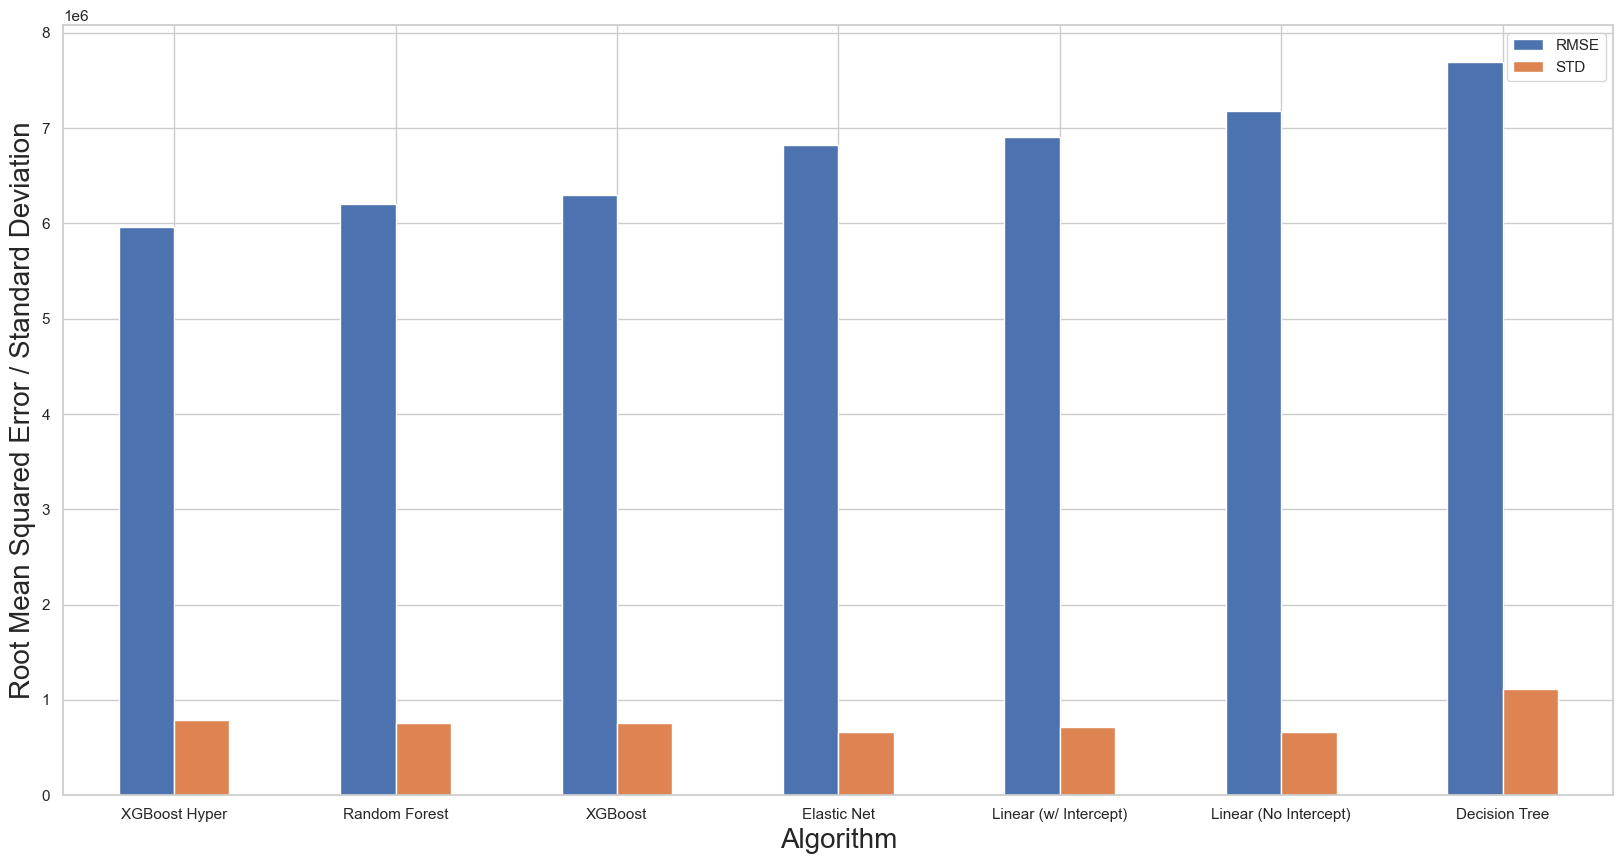

In [49]:
# creating the bar plot
data_df.plot(kind="bar", x="Algorithm", y=["RMSE", "STD"], figsize=(20, 10), rot=0)
plt.xlabel("Algorithm", fontsize=20)
plt.ylabel("Root Mean Squared Error / Standard Deviation", fontsize=20)
plt.show()

In [50]:
from sklearn.ensemble import StackingRegressor

# first stacking model
  
estimators = [
   ('decision_tree', dt),
   ('rf', rf),
]


sr = StackingRegressor(
   estimators=estimators,
   final_estimator=model_xgb
)

In [51]:
from sklearn.ensemble import VotingRegressor

# voting stacking model, putting weights on different models

vr = VotingRegressor([
   ('rf', rf),
   ('model_xgb', model_xgb),
   ('decision_tree', dt),
  
], weights=[1,1,3])

In [52]:
estimators2 = [
   ('rf', rf),
   ('model_xgb', model_xgb),
   #('decision_tree', dt)
]

# using the voting model as our final estimator

sr2 = StackingRegressor(
   estimators=estimators2,
   final_estimator=vr
)

In [53]:
rf_list = compute_rmse_std_k_fold(nba_df, rf)
model_xgb_list = compute_rmse_std_k_fold(nba_df, model_xgb)
dt_list = compute_rmse_std_k_fold(nba_df, dt)

sr_list = compute_rmse_std_k_fold(nba_df, sr)
vr_list = compute_rmse_std_k_fold(nba_df, vr)
sr2_list = compute_rmse_std_k_fold(nba_df, sr2)

#model_xgb_hyper_list = compute_rmse_std_k_fold(nba_df, model_xgb, tune_hyper=True)

# plot RMSE and STD for each Algorithm
data = {
    "Random Forest": rf_list,
    "XGBoost": model_xgb_list,
    "Decision Tree": dt_list,
    
    "Stacking Regressor": sr_list,
    "Voting Regressor": vr_list,
    "Stacking Regressor 2": sr2_list,
    
    #"XGBoost Hyper": model_xgb_hyper_list,
}
data_df = pd.DataFrame(data=data).T.reset_index().sort_values(by=[0], ascending=True)
data_df.columns = ["Algorithm", "RMSE", "STD"]

Random Forest: 5849714.2219, Train Size: 300, Test Size: 76
Random Forest: 4815240.7985, Train Size: 301, Test Size: 75
Random Forest: 6892335.8105, Train Size: 301, Test Size: 75
Random Forest: 6859461.5819, Train Size: 301, Test Size: 75
Random Forest: 6482866.1159, Train Size: 301, Test Size: 75


In [54]:
data_df

,Algorithm,RMSE,STD
1,XGBoost,5.872644e+06,8.037180e+05
0,Random Forest,6.179924e+06,7.787778e+05
4,Voting Regressor,6.271334e+06,1.420241e+06
2,Decision Tree,8.108477e+06,9.090447e+05
5,Stacking Regressor 2,1.069074e+07,1.490888e+06
3,Stacking Regressor,1.084449e+07,1.380727e+06


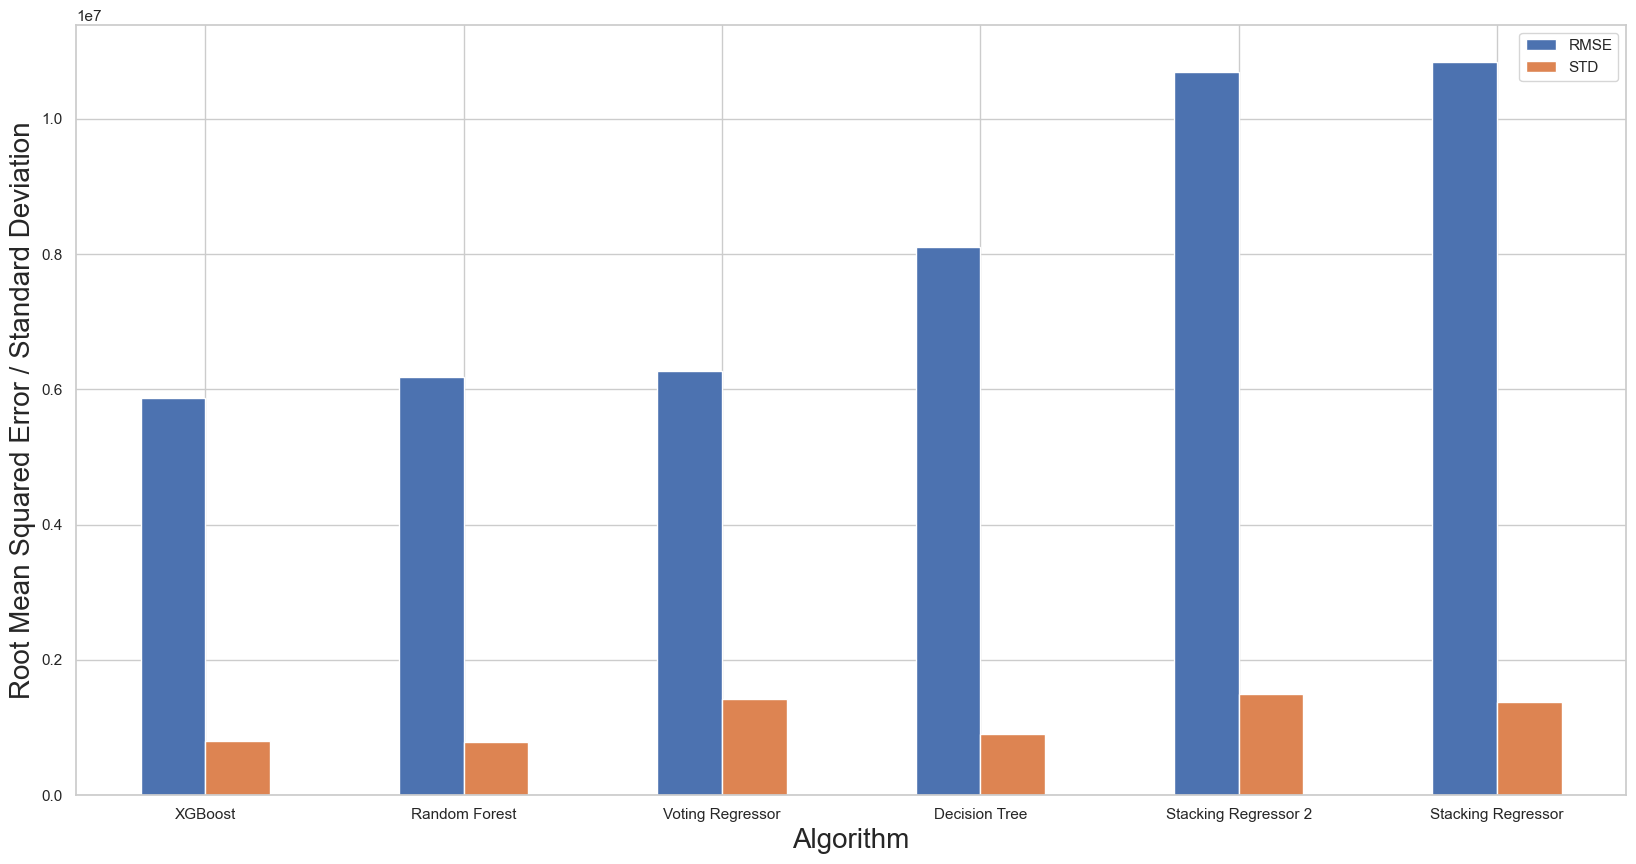

In [55]:
# creating the bar plot
data_df.plot(kind="bar", x="Algorithm", y=["RMSE", "STD"], figsize=(20, 10), rot=0)
plt.xlabel("Algorithm", fontsize=20)
plt.ylabel("Root Mean Squared Error / Standard Deviation", fontsize=20)
plt.show()

In [56]:
rf_list = k_fold_regression(nba_df, rf, model_name="Random Forest")
rf_preds = rf_list[0]
rf_models = rf_list[4]

rf_preds.head()

Random Forest: 5215066.1446, Train Size: 300, Test Size: 76
Random Forest: 5956711.5080, Train Size: 301, Test Size: 75
Random Forest: 6490637.9771, Train Size: 301, Test Size: 75
Random Forest: 6176069.2281, Train Size: 301, Test Size: 75
Random Forest: 6526895.2542, Train Size: 301, Test Size: 75


,Id,Actual,Predicted,rmse
0,0,"[48070014, 42492492, 42492492, 42492492, 30913...","[39134351.49907594, 35075793.47735996, 2997492...",5.215066e+06
1,1,"[47345760, 37653300, 31650600, 31377750, 20955...","[9336611.233842831, 27887941.711812776, 224490...",5.956712e+06
2,2,"[44474988, 42492492, 37096500, 35448672, 35448...","[40461033.180626355, 38161422.75868836, 220429...",6.490638e+06
3,3,"[47080179, 43279250, 40600080, 37096500, 33616...","[22727921.214731626, 30297336.981471017, 23552...",6.176069e+06
4,4,"[44119845, 38917057, 38172414, 37984276, 37980...","[39378351.81909782, 31616605.6707521, 14955103...",6.526895e+06


In [57]:
sorted_df = rf_preds.sort_values(by='rmse', ascending=True)

# Grab the first row of the sorted DataFrame
first_row = sorted_df.iloc[0]

In [58]:
print(first_row[["Actual", "Predicted"]])

Actual       [48070014, 42492492, 42492492, 42492492, 30913...
Predicted    [39134351.49907594, 35075793.47735996, 2997492...
Name: 0, dtype: object


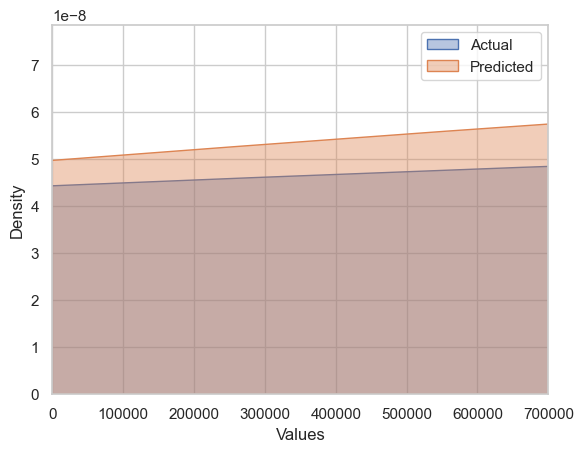

In [59]:
actual_values = first_row["Actual"]
predicted_values = first_row["Predicted"]

# Plot the density plots for Actual and Predicted values
sns.kdeplot(
    data=actual_values,
    fill=True,
    common_norm=False,
    alpha=0.4,
    label="Actual"
)
sns.kdeplot(
    data=predicted_values,
    fill=True,
    common_norm=False,
    alpha=0.4,
    label="Predicted"
)

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Density")
plt.xlim((0, 700000))
plt.legend()
plt.show()


In [60]:
first_row['Difference'] = first_row['Actual'] - first_row['Predicted']

In [61]:
print("min prediction: ", first_row["Predicted"].min())
print("max prediction: ", first_row["Predicted"].max())
print("max error: ", first_row["Difference"].max())
print("mean error: ", abs(first_row["Difference"]).mean())
print("median error: ", np.median(abs(first_row["Difference"])))

min prediction:  1384062.0681731075
max prediction:  39134351.49907594
max error:  23077648.33588807
mean error:  3226380.662417055
median error:  1780789.8071733154


In [62]:
bestdiffs = pd.Series(first_row['Difference'])
# plot a histogram of the difference of our actuals and predictions
bestdiffs.hist(bins=50)

<Axes: >

In [63]:
print(first_row)

Id                                                            0
Actual        [48070014, 42492492, 42492492, 42492492, 30913...
Predicted     [39134351.49907594, 35075793.47735996, 2997492...
rmse                                             5215066.144636
Difference    [8935662.500924058, 7416698.522640042, 1251756...
Name: 0, dtype: object


In [64]:
filtered_values = bestdiffs[bestdiffs > 10000000]

# Print the filtered Series
print("Here is the low outlier value: " + str(filtered_values.iloc[0]))

# Get the low outlier value
low_outlier_value = filtered_values.iloc[0]

# Find the index of 1 in first_row
index = np.where(first_row['Difference'] == low_outlier_value)[0][0]
# Get the corresponding 'Actual' value from first_row using boolean indexing
corresponding_actual = first_row['Actual'][index]

# Print the corresponding 'Actual' value
print("The 'Actual' value corresponding to the outlier value is:", corresponding_actual)

corresponding_Predicted = first_row['Predicted'][index]

# Print the corresponding 'Actual' value
print("The 'Predicted' value corresponding to the outlier value is:", corresponding_Predicted)

nba_df[nba_df['Salary'] == corresponding_actual]

Here is the low outlier value: 12517568.47528562
The 'Actual' value corresponding to the outlier value is: 42492492
The 'Predicted' value corresponding to the outlier value is: 29974923.52471438


,Id,PlayerName,Salary,Age,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,FT%,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TotalMinutes,PER,FTr,AST%,USG%,OWS,DWS,WS,WS/48,OBPM,BPM,VORP,Salary_normalized,Position_encoded,Team_encoded
6,6,Kawhi Leonard,42492492,4.545286,5.357203,4.677436,2.692764,3.601000,1.194318,2.011399,2.370469,3.116900,1.988790,2.140490,0.656852,2.140490,2.352532,1.794654,0.935553,0.418049,1.071059,1.027379,4.124701,13.766102,4.131217,0.283494,3.828488,4.322948,4.9,1.270788,7.1,0.194,5.1,6.1,3.5,17.564838,4,29
7,7,Paul George,42492492,4.597157,5.559490,4.726022,2.633204,3.693769,1.478056,2.539599,2.140490,2.924479,1.965840,2.119710,0.656852,2.119710,2.278687,2.077294,0.982247,0.345108,1.571419,1.478056,4.124701,14.086243,3.828488,0.261982,4.150632,4.464834,2.3,1.307510,4.6,0.114,2.4,2.8,2.3,17.564838,4,29
8,8,Giannis Antetokounmpo,42492492,4.380946,5.773773,4.602270,3.035366,3.881226,0.552317,1.445540,2.949753,3.668933,2.587072,3.161816,0.516792,2.832918,3.105486,2.201216,0.614477,0.614477,1.794654,1.571419,4.550534,14.220162,4.437269,0.489647,4.657667,4.918204,4.9,1.741928,8.6,0.204,5.8,8.5,5.4,17.564838,1,41
9,9,Damian Lillard,42492492,4.597157,5.622899,4.806018,2.832918,3.910703,1.870411,3.047253,2.140490,2.805814,2.721756,2.832918,0.681856,1.820334,2.011399,2.490697,0.673768,0.267595,1.630485,1.154444,4.607370,14.346395,4.305205,0.392280,4.745132,4.687248,8.2,0.614477,9.0,0.205,8.3,7.1,4.9,17.564838,2,60


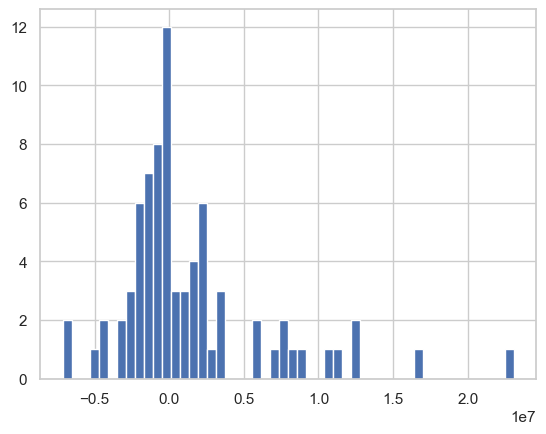

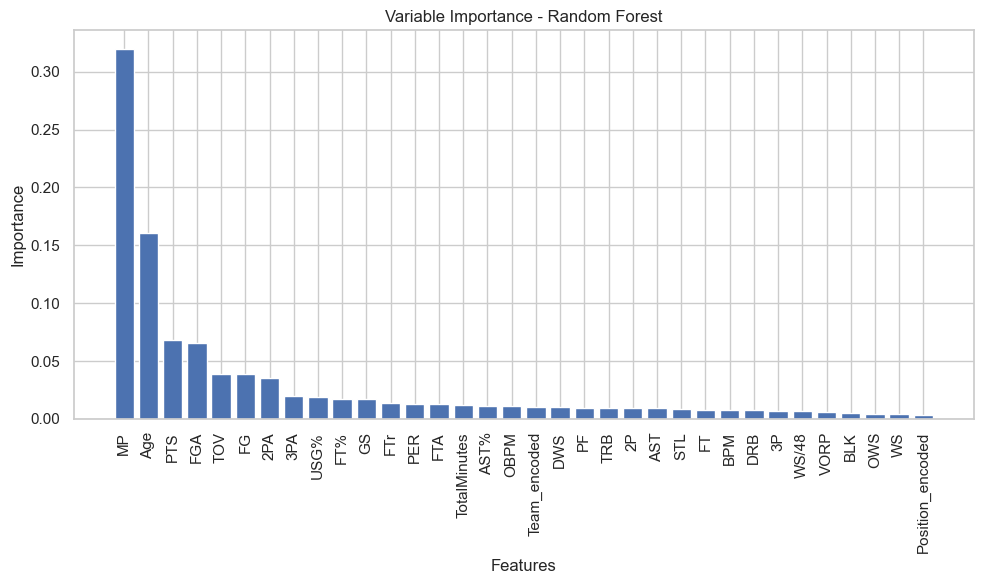

In [65]:
# Get the feature names
feature_names = nba_df.columns.drop(['Salary', 'Id', 'PlayerName', 'Salary_normalized'])

# Get the first model from the list
model = rf_models[0]

# Get the feature importances of the first model
feature_importances = model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]

# Create a single plot for the first model
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(range(len(feature_importances)), feature_importances[sorted_indices])
ax.set_xticks(range(len(feature_importances)))
ax.set_xticklabels(feature_names[sorted_indices], rotation=90)
ax.set_xlabel("Features")
ax.set_ylabel("Importance")
ax.set_title("Variable Importance - Random Forest")

plt.tight_layout()
plt.show()

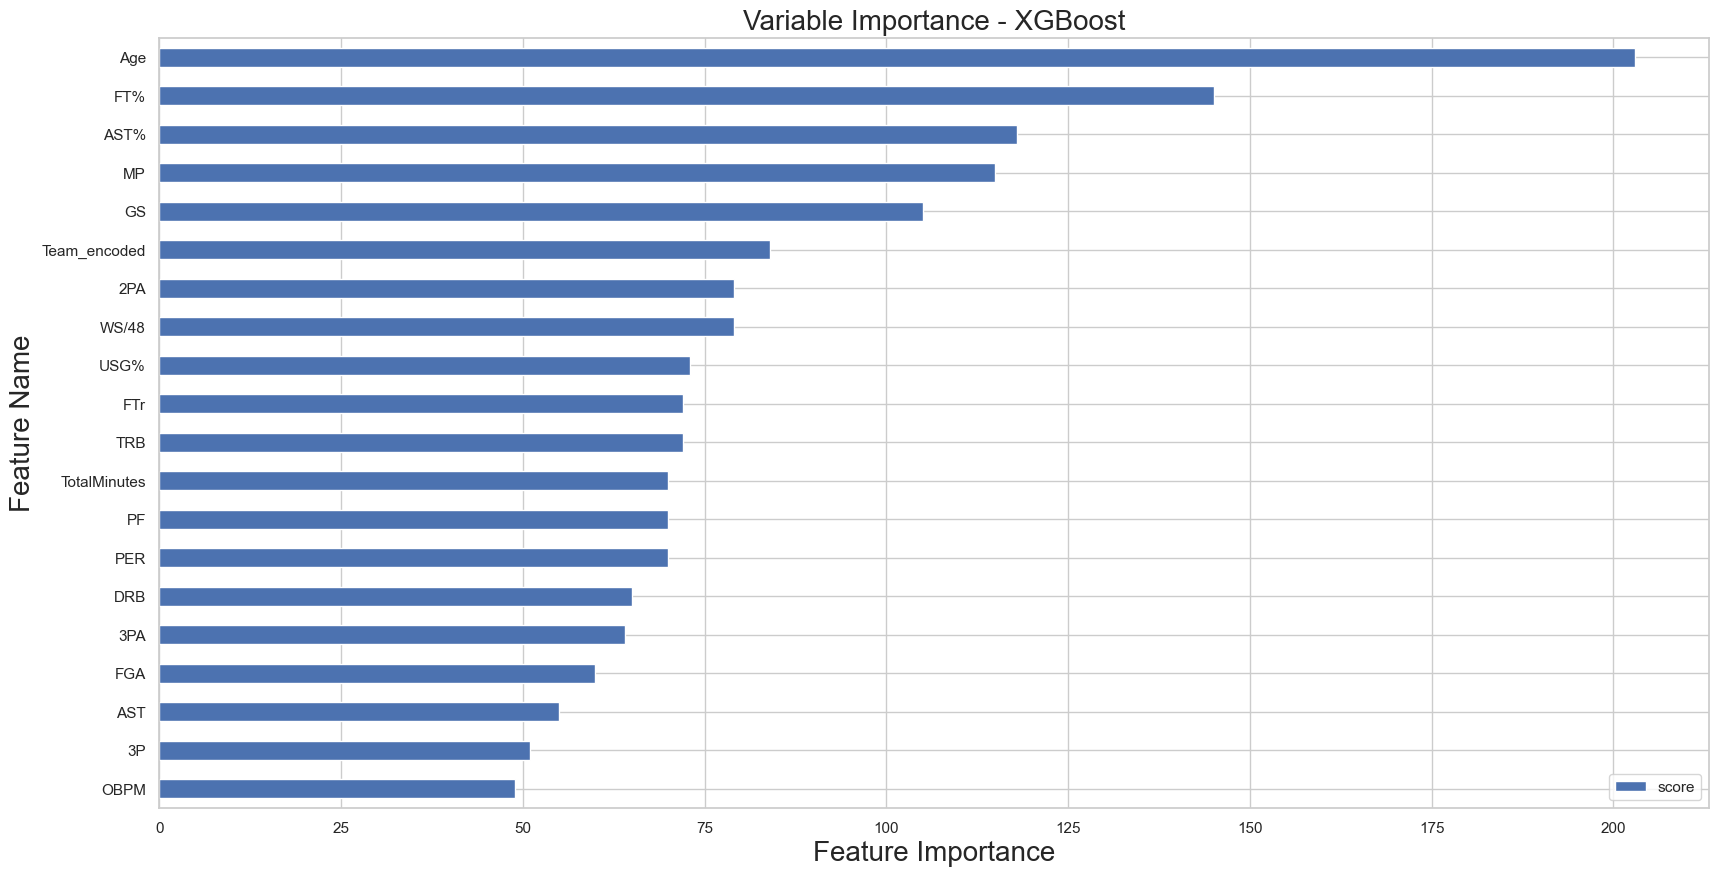

In [66]:
feature_important = model_xgb.get_booster().get_score(importance_type="weight")

keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(
    by="score", ascending=False
)
data[:20].plot(kind="barh", figsize=(20, 10)).invert_yaxis()
## plot top 20 features
plt.xlabel("Feature Importance", fontsize=20)
plt.ylabel("Feature Name", fontsize=20)
plt.title("Variable Importance - XGBoost", fontsize=20)
plt.show()